## Descriptive statistics

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Isha/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read CSV files from data folder and store in dataframes
hackathons_webscraped = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/hackathons_webscraped_cleaned.csv')
hackathons = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/hackathons_modified.csv')
projects = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/projects_modified.csv')
participants_expanded = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/participants_expanded_gender.csv')

In [3]:
hackathons.columns
hackathons_webscraped.columns
del hackathons_webscraped['Unnamed: 0']
del hackathons['Unnamed: 0']

Thus, columns being transferred from webscraped to hackathons df are - 'Subtitles', 'Judging Criteria', 'Cleaned_Sponsors', 'Cleaned_Judges', 'Cleaned_Eligibility', 'Cleaned_Requirements'

In [4]:
# Thus, columns being transferred from hackathons_webscraped to hackathons are - 'Subtitles', 'Judging Criteria', 'Cleaned_Sponsors', 'Cleaned_Judges', 'Cleaned_Eligibility', 'Cleaned_Requirements'

hackathons['Subtitles'] = hackathons_webscraped['Subtitles']
hackathons['Sponsors'] = hackathons_webscraped['Cleaned_Sponsors']
hackathons['Judges'] = hackathons_webscraped['Cleaned_Judges']
hackathons['Eligibility'] = hackathons_webscraped['Cleaned_Eligibility']
hackathons['Requirements'] = hackathons_webscraped['Cleaned_Requirements']

# Rename column 'Criteria' to 'Judging Criteria'
hackathons = hackathons.rename(columns={'Criteria': 'Judging Criteria'})

### Registered participants  described and visualised 

Descriptive Statistics for Number of Registered Participants:
count     7053.000000
mean       142.314193
std        432.513814
min          0.000000
25%         24.000000
50%         60.000000
75%        143.000000
max      18701.000000
Name: registered_N, dtype: float64


/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


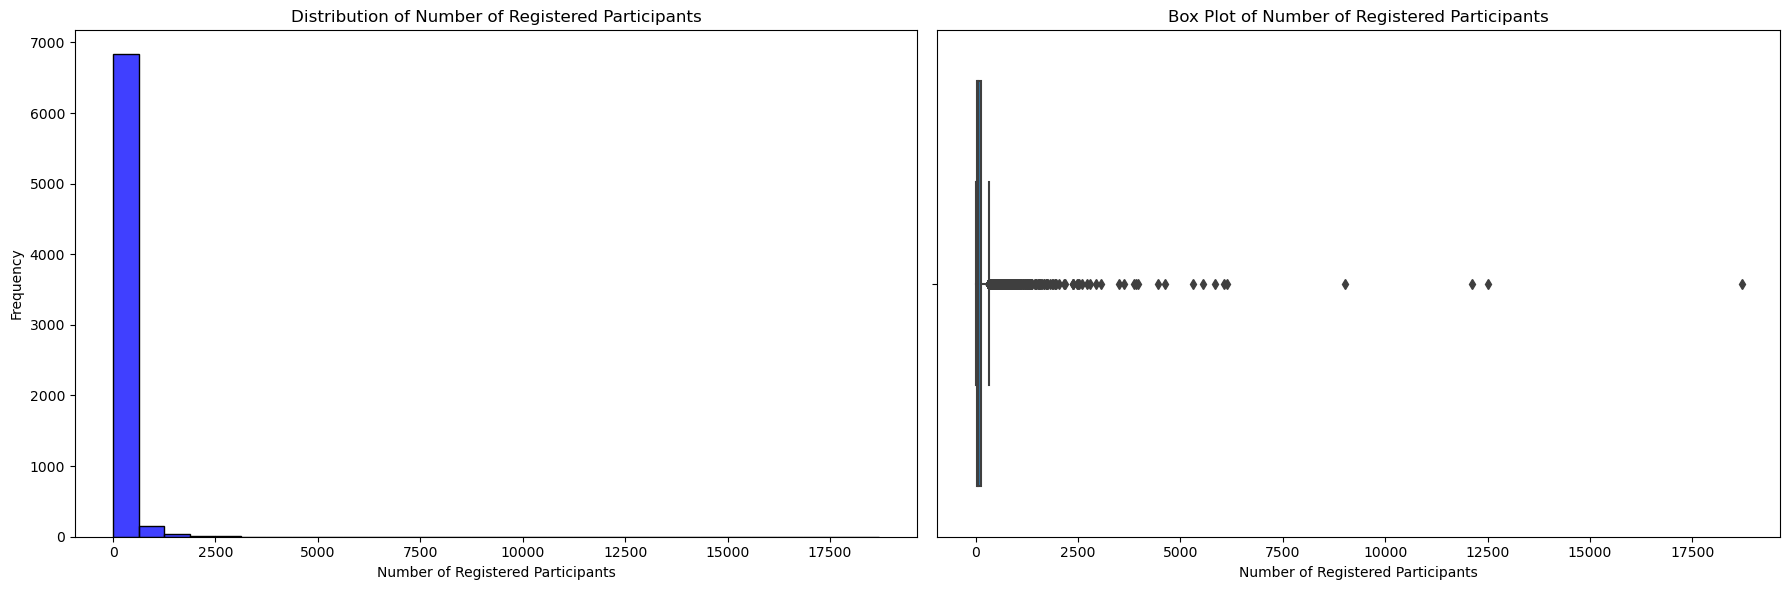

In [5]:
print("Descriptive Statistics for Number of Registered Participants:")
print(hackathons['registered_N'].describe())

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(hackathons['registered_N'], kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Number of Registered Participants")
axes[0].set_xlabel("Number of Registered Participants")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=hackathons['registered_N'], ax=axes[1])
axes[1].set_title("Box Plot of Number of Registered Participants")
axes[1].set_xlabel("Number of Registered Participants")

plt.tight_layout()
plt.show()


### Location distribution

In [6]:
# Clean up the location by stripping white spaces and lowering the case
hackathons['normalized_location'] = hackathons['Location'].str.strip().str.lower()

# Correct common redundancies
# Example: Combining similar "new york" locations
hackathons['normalized_location'] = hackathons['normalized_location'].replace({
    "new york, ny, usa": "new york, ny, usa",
    "new york, new york, usa": "new york, ny, usa"
})

# Similarly, other similar location combinations can be handled
hackathons['normalized_location'].replace({
    "san francisco, ca, usa": "san francisco, ca, usa",
    "philadelphia, pa, usa": "philadelphia, pa, usa"
}, inplace=True)

# Count unique locations
unique_location_counts = hackathons['normalized_location'].value_counts()

unique_location_counts

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_30860/758870597.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hackathons['normalized_location'].replace({


normalized_location
online                                    2499
new york, ny, usa                           63
san francisco, ca, usa                      26
philadelphia, pa, usa                       19
los angeles, ca, usa                        14
                                          ... 
stefanini                                    1
vienna zoo schönbrunn                        1
the hub - hong kong                          1
s. dillon ripley center, washington dc       1
quận 2, vietnam                              1
Name: count, Length: 3324, dtype: int64

In [7]:
!pip install geopy
from geopy.geocoders import Nominatim
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Sample Data
unique_location_counts = unique_location_counts.reset_index()
unique_location_counts.columns = ['location', 'count']

# Geocoding function
geolocator = Nominatim(user_agent="hackathon_locator")

def get_coordinates(location):
    try:
        location_obj = geolocator.geocode(location, timeout=10)
        return (location_obj.latitude, location_obj.longitude)
    except:
        return (None, None)

# Add coordinates to the DataFrame
unique_location_counts['coordinates'] = unique_location_counts['location'].apply(get_coordinates)
unique_location_counts['latitude'] = unique_location_counts['coordinates'].apply(lambda x: x[0])
unique_location_counts['longitude'] = unique_location_counts['coordinates'].apply(lambda x: x[1])

# Drop rows with missing coordinates
unique_location_counts = unique_location_counts.dropna(subset=['latitude', 'longitude'])

# Display the DataFrame
unique_location_counts


,location,count,coordinates,latitude,longitude
0,online,2499,"(43.59047185, 3.8595132132013186)",43.590472,3.859513
1,"new york, ny, usa",63,"(40.7127281, -74.0060152)",40.712728,-74.006015
2,"san francisco, ca, usa",26,"(37.7792588, -122.4193286)",37.779259,-122.419329
3,"philadelphia, pa, usa",19,"(39.9527237, -75.1635262)",39.952724,-75.163526
4,"los angeles, ca, usa",14,"(34.0536909, -118.242766)",34.053691,-118.242766
...,...,...,...,...,...
3318,kuala lumpur,1,"(3.1516964, 101.6942371)",3.151696,101.694237
3319,stefanini,1,"(47.0262218, 28.8229779)",47.026222,28.822978
3320,vienna zoo schönbrunn,1,"(48.1817341, 16.304771683620686)",48.181734,16.304772
3321,the hub - hong kong,1,"(22.3126695, 114.0416696)",22.312669,114.041670


In [8]:
# Create a folium map
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for _, row in unique_location_counts.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['location']}: {row['count']} hackathons",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Show map
m

### Online vs Offline participation allowed
create a new column called participation_type based on whether "online" is mentioned in the 'info' column.

In [9]:
# Step 1: Classify hackathons as online or offline
hackathons['participation_type'] = hackathons['info'].apply(
    lambda x: 'Online' if 'online' in x.lower() else 'Offline'
)

# Step 2: Count the number of hackathons for each type
participation_counts = hackathons['participation_type'].value_counts()
print(participation_counts)

participation_type
Offline    4546
Online     2507
Name: count, dtype: int64


### Prize money vs No prize money 

In [10]:
# Step 1: Classify based on prize_money column
def classify_prize_money(value):
    value_str = str(value).lower()
    if 'no money prize' in value_str:
        return 'No Prize Money'
    else:
        return 'Has Prize Money'

hackathons['prize_money_status'] = hackathons['prize_money'].apply(classify_prize_money)

# Step 2: Count the number of hackathons for each category
prize_money_counts = hackathons['prize_money_status'].value_counts()
print(prize_money_counts)


prize_money_status
Has Prize Money    5276
No Prize Money     1777
Name: count, dtype: int64


### Duration of hackthons - for each, on average 1) for online vs offline 2) for prize money vs no prize money

In [11]:
# Convert dates to datetime format
hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'])

# Calculate duration
hackathons['duration_days'] = (hackathons['end_date_format'] - hackathons['start_date_format']).dt.days

In [12]:
hackathons['duration_days'].describe()

count    7053.000000
mean        8.386786
std        22.412953
min        -2.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       403.000000
Name: duration_days, dtype: float64

In [13]:
# Calculate average duration for Online vs Offline
average_duration_online_offline = hackathons.groupby('participation_type')['duration_days'].mean()
print("Average Duration (Online vs Offline):")
print(average_duration_online_offline)

# Calculate average duration for Prize Money vs No Prize Money
average_duration_prize_money = hackathons.groupby('prize_money_status')['duration_days'].mean()
print("\nAverage Duration (Prize Money vs No Prize Money):")
print(average_duration_prize_money)

Average Duration (Online vs Offline):
participation_type
Offline     2.751870
Online     18.604707
Name: duration_days, dtype: float64

Average Duration (Prize Money vs No Prize Money):
prize_money_status
Has Prize Money    9.257392
No Prize Money     5.801913
Name: duration_days, dtype: float64


In [14]:
# Calculate average duration for each combination
average_duration_combination = hackathons.groupby(['participation_type', 'prize_money_status'])['duration_days'].mean()

# Display the results
print("Average Duration (Online/Offline + Prize Money/No Prize Money):")
print(average_duration_combination)

Average Duration (Online/Offline + Prize Money/No Prize Money):
participation_type  prize_money_status
Offline             Has Prize Money        2.448826
                    No Prize Money         3.574346
Online              Has Prize Money       20.832651
                    No Prize Money        10.732369
Name: duration_days, dtype: float64


### Public Vs Private (Invite only) hackathons

In [15]:
hack_type_counts = hackathons['hack_type'].value_counts()
print(hack_type_counts)

hack_type
Public         6692
Invite only     361
Name: count, dtype: int64


In [16]:
# Calculate average duration for each combination
average_hack_duration_combination = hackathons.groupby(['hack_type', 'prize_money_status'])['duration_days'].mean()
print(average_hack_duration_combination)

hack_type    prize_money_status
Invite only  Has Prize Money        4.022727
             No Prize Money        10.391753
Public       Has Prize Money        9.533121
             No Prize Money         5.536905
Name: duration_days, dtype: float64


### Themes
Given the structure of the themes column in the hackathons DataFrame, where themes are nested in double brackets, we first extract the inner list to have a list of themes for each hackathon. Then we can count the unique themes across all hackathons.

In [17]:
from collections import Counter

# Ensure the column is treated as string and split on ', ' to get lists of themes
hackathons['themes'] = hackathons['themes'].astype(str).apply(lambda x: x.split(', '))

# Verify the operation worked as expected by inspecting the first few entries
# print(hackathons['themes'].head())

# Flatten the list of lists into a single list
all_themes = [theme for sublist in hackathons['themes'].dropna() for theme in sublist]

# Count the frequency of each theme
theme_counts = Counter(all_themes)

theme_counts

Counter({'Social Good': 1176,
         'COVID-19': 332,
         'Blockchain': 331,
         'Open Ended': 443,
         'Not Specified': 4319,
         'Web': 145,
         'Fintech': 177,
         'Beginner Friendly': 850,
         'Machine Learning/AI': 518,
         'Productivity': 282,
         'Education': 384,
         'Gaming': 141,
         'Mobile': 65,
         'Cybersecurity': 96,
         'Enterprise': 68,
         'IoT': 152,
         'Communication': 219,
         'Lifehacks': 120,
         'Health': 225,
         'AR/VR': 139,
         'Design': 187,
         'Voice skills': 32,
         'DevOps': 108,
         'Low/No Code': 81,
         'E-commerce/Retail': 26,
         'Quantum': 4,
         'Music/Art': 22})

#### Themes Synonymous with "Learning":
Machine Learning/AI,
Beginner Friendly,
Education,
DevOps,
Low/No Code,
Quantum

#### Themes Synonymous with "Networking"
Social Good,
AR/VR,
Blockchain,
Communication,
Web

#### Themes Synonymous with "Experience"
Open Ended,
Voice skills,
Productivity,
Gaming,
Music/Art,
IoT,
Design,
Fintech,
Health,
Enterprise,
E-commerce/Retail,

In [18]:
# Display the most common themes
print("Most common themes and their counts:")
for theme, count in theme_counts.most_common():
    print(f"{theme}: {count}")

hackathons['themes']

Most common themes and their counts:
Not Specified: 4319
Social Good: 1176
Beginner Friendly: 850
Machine Learning/AI: 518
Open Ended: 443
Education: 384
COVID-19: 332
Blockchain: 331
Productivity: 282
Health: 225
Communication: 219
Design: 187
Fintech: 177
IoT: 152
Web: 145
Gaming: 141
AR/VR: 139
Lifehacks: 120
DevOps: 108
Cybersecurity: 96
Low/No Code: 81
Enterprise: 68
Mobile: 65
Voice skills: 32
E-commerce/Retail: 26
Music/Art: 22
Quantum: 4


0                        [Social Good, COVID-19]
1                                     [COVID-19]
2          [Social Good, Blockchain, Open Ended]
3                                [Not Specified]
4                     [Blockchain, Web, Fintech]
                          ...                   
7048                              [Voice skills]
7049    [AR/VR, Machine Learning/AI, Open Ended]
7050                                [Open Ended]
7051                              [Voice skills]
7052                              [Voice skills]
Name: themes, Length: 7053, dtype: object

Categorising the themes into a theme_focus_domain among: Learning, Experience, Networking, and Development

In [19]:
# Define the keywords
learning_themes = {"Beginner Friendly", "Education", "DevOps", "Low/No Code"}
networking_themes = {"Social Good", "Communication", "COVID-19"}
experience_themes = {"Open Ended", "Voice skills", "Productivity", "Lifehacks"}
development_themes = {"Machine Learning/AI", "Quantum", "AR/VR", "Blockchain", "Web", "Gaming", "Music/Art", "IoT", "Design", "Fintech", "Health", "Enterprise", "E-commerce/Retail", "Mobile"}
not_specified_theme = {"Not Specified"}

def classify_theme(themes):
    focus = set()
    
    for theme in themes:
        if theme in learning_themes:
            focus.add("Learning")
        if theme in networking_themes:
            focus.add("Networking")
        if theme in experience_themes:
            focus.add("Experience")
        if theme in development_themes:
            focus.add("Development")
        if theme in not_specified_theme:
            focus.add("Not Specified")
    
    return ', '.join(sorted(focus))

# Assuming 'hackathons' is your DataFrame and 'themes' is the column with the list of themes
hackathons['theme_domain_focus'] = hackathons['themes'].apply(classify_theme)

# Display the resulting DataFrame
hackathons[['themes','prize_money','prize_money_status','theme_domain_focus']]

,themes,prize_money,prize_money_status,theme_domain_focus
0,"[Social Good, COVID-19]",no money prize,No Prize Money,Networking
1,[COVID-19],no money prize,No Prize Money,Networking
2,"[Social Good, Blockchain, Open Ended]","$765,000",Has Prize Money,"Development, Experience, Networking"
3,[Not Specified],"SAR2,000,000",Has Prize Money,Not Specified
4,"[Blockchain, Web, Fintech]","$1,019,000",Has Prize Money,Development
...,...,...,...,...
7048,[Voice skills],"$1,000",Has Prize Money,Experience
7049,"[AR/VR, Machine Learning/AI, Open Ended]","$1,100",Has Prize Money,"Development, Experience"
7050,[Open Ended],no money prize,No Prize Money,Experience
7051,[Voice skills],$100,Has Prize Money,Experience


## Participants

In [20]:
del participants_expanded['Unnamed: 0.1']
del participants_expanded['Unnamed: 0']
del participants_expanded['gender_guesser_lib']

In [21]:
participants_expanded

,url,name,website,github,twitter,address,skills,interests,projects,hackathons,cleaned_names,Gender,Gender Probability,genderize.io,Genderize.io Probability
0,https://devpost.com/CraigHiller,Craig Hiller,NaN,NaN,NaN,NaN,NaN,NaN,https://devpost.com/software/googme,https://calhacks.devpost.com/,Craig Hiller,m,1.00,m,1.00
1,https://devpost.com/asheleby,Andrew Sheleby,NaN,NaN,NaN,United States,wordpress|python|tableau|excel|Blockchain|,AR/VR|Blockchain|Communication|Cybersecurity|D...,https://devpost.com/software/helpr-27tjik,https://hackhealth-2021.devpost.com/,Andrew Sheleby,m,1.00,m,1.00
2,https://devpost.com/evanho239,Evan Ho,NaN,NaN,NaN,United States,java|c++|javascript|angular.js|css|html|Blockc...,Beginner Friendly|Blockchain|Cybersecurity|Des...,https://devpost.com/software/untitled-for-now,https://hack32022.devpost.com/,Evan Ho,m,1.00,m,1.00
3,https://devpost.com/brilamb,Brian Lam,https://github.com/Brooseidon,https://github.com/Brooseidon,NaN,US,java|javascript|,Communication|Cybersecurity|Gaming|IoT|Machine...,https://devpost.com/software/the-hummingbird-p...,"https://hacksc-2020.devpost.com/,https://sd-ha...",Brian Lam,m,1.00,m,1.00
4,https://devpost.com/linpeng06,lin peng,https://github.com/linpeng06,https://github.com/linpeng06,NaN,NaN,android|javascript|php|java|ios|jquery|css|htm...,NaN,https://devpost.com/software/arduinosetup,https://pearlhacks2016.devpost.com/,Lin Peng,m,0.99,m,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56490,https://devpost.com/mike1572,Mike Dimitrov,https://mikedimitrov.io/,https://github.com/mike1572,NaN,Canada,python|java|react|react-native|firebase|c#|nod...,AR/VR|Blockchain|E-commerce/Retail|Fintech|Mac...,https://devpost.com/software/textbook-exchange...,https://hack-mcwics-2022.devpost.com/,Mike Dimitrov,m,1.00,m,1.00
56491,https://devpost.com/bengao,Baiyun (Ben) Gao,NaN,NaN,NaN,United States,mac|web|windows|,NaN,https://devpost.com/software/odataxpt-open-dat...,https://gsatraveldata.devpost.com/,Baiyun ( Ben) Gao,f,0.70,f,0.70
56492,https://devpost.com/EveretS,Everet Siew,NaN,NaN,NaN,NaN,NaN,NaN,https://devpost.com/software/let-s-greet,https://tactrickdevcup.devpost.com/,Everet Siew,m,1.00,m,1.00
56493,https://devpost.com/amulyagarimella,Amulya Garimella,https://amulyagarimella.github.io/,https://github.com/amulyagarimella,NaN,United States,web|react|python|flask|html5|websockets|node.j...,Beginner Friendly|Design|Education|Health|Mach...,https://devpost.com/software/locavore,https://wafflehacks-2022.devpost.com/,Amulya Garimella,f,0.99,f,0.99


In [22]:
# Gender Distribution
gender_distribution = participants_expanded['Gender'].value_counts()

# Display the results
gender_distribution

Gender
m          39617
f          13684
unknown     3194
Name: count, dtype: int64

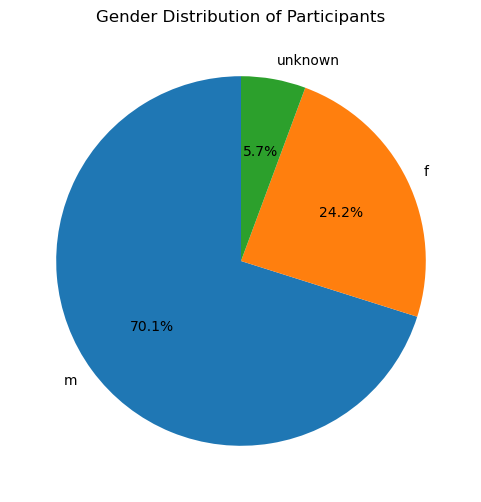

In [23]:
# Pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution of Participants")
plt.show()

### Top 10 most common skills and interests

In [24]:
# Convert pipe-separated strings to lists for 'skills' and 'interests' columns
participants_expanded['skills'] = participants_expanded['skills'].fillna(",").apply(lambda x: x.split("|") if x else [])
participants_expanded['interests'] = participants_expanded['interests'].fillna(",").apply(lambda x: x.split("|") if x else [])
participants_expanded[['skills','interests']]

,skills,interests
0,"[,]","[,]"
1,"[wordpress, python, tableau, excel, Blockchain, ]","[AR/VR, Blockchain, Communication, Cybersecuri..."
2,"[java, c++, javascript, angular.js, css, html,...","[Beginner Friendly, Blockchain, Cybersecurity,..."
3,"[java, javascript, ]","[Communication, Cybersecurity, Gaming, IoT, Ma..."
4,"[android, javascript, php, java, ios, jquery, ...","[,]"
...,...,...
56490,"[python, java, react, react-native, firebase, ...","[AR/VR, Blockchain, E-commerce/Retail, Fintech..."
56491,"[mac, web, windows, ]","[,]"
56492,"[,]","[,]"
56493,"[web, react, python, flask, html5, websockets,...","[Beginner Friendly, Design, Education, Health,..."


In [25]:
from collections import Counter
import itertools

# Skills
all_skills = list(itertools.chain.from_iterable(participants_expanded['skills']))
skill_counts = Counter(all_skills)
common_skills = skill_counts.most_common(12) # top 10 most common skills 

# Interests
all_interests = list(itertools.chain.from_iterable(participants_expanded['interests']))
interest_counts = Counter(all_interests)
common_interests = interest_counts.most_common(12) # top 10 most common 

common_skills, common_interests
common_skills.remove(('', 45946)) # removing nonsensical values
common_skills.remove((',', 10549)) # removing nonsensical values
common_interests.remove((',', 30625)) # removing nonsensical values
common_interests.remove(('', 25870)) # removing nonsensical values

print('common skills',common_skills)
print('common interests',common_interests)

common skills [('python', 23910), ('java', 21142), ('javascript', 17249), ('c++', 9995), ('html5', 8812), ('css', 8472), ('c', 6976), ('html', 6041), ('Blockchain', 5969), ('android', 5058)]
common interests [('Machine Learning/AI', 13487), ('Social Good', 9438), ('Productivity', 9097), ('Gaming', 8148), ('Communication', 6418), ('IoT', 6063), ('Cybersecurity', 6005), ('AR/VR', 5974), ('Blockchain', 5969), ('Lifehacks', 5299)]


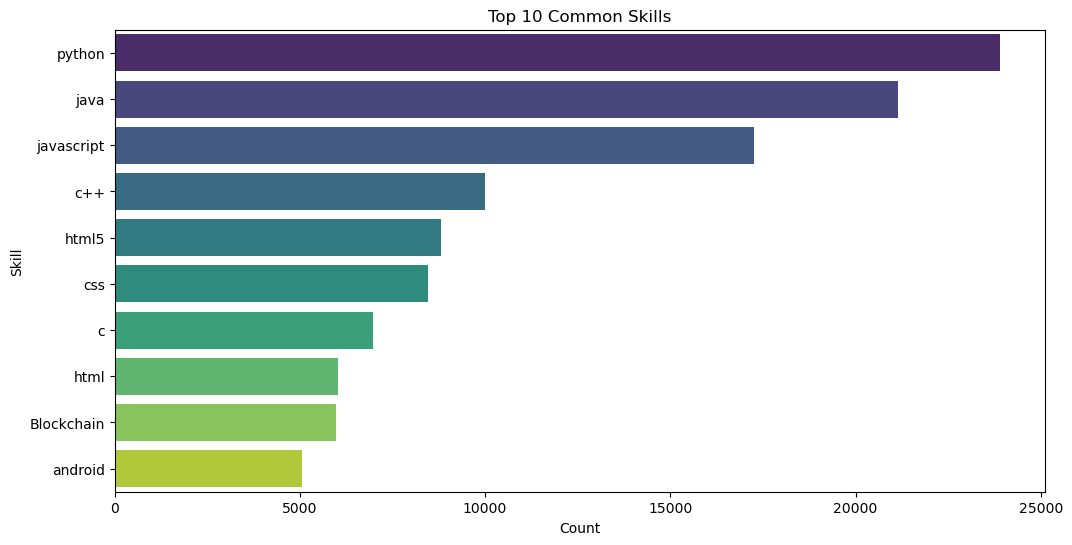

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot most common skills
skills_df = pd.DataFrame(common_skills, columns=['Skill', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
plt.title("Top 10 Common Skills")
plt.show()


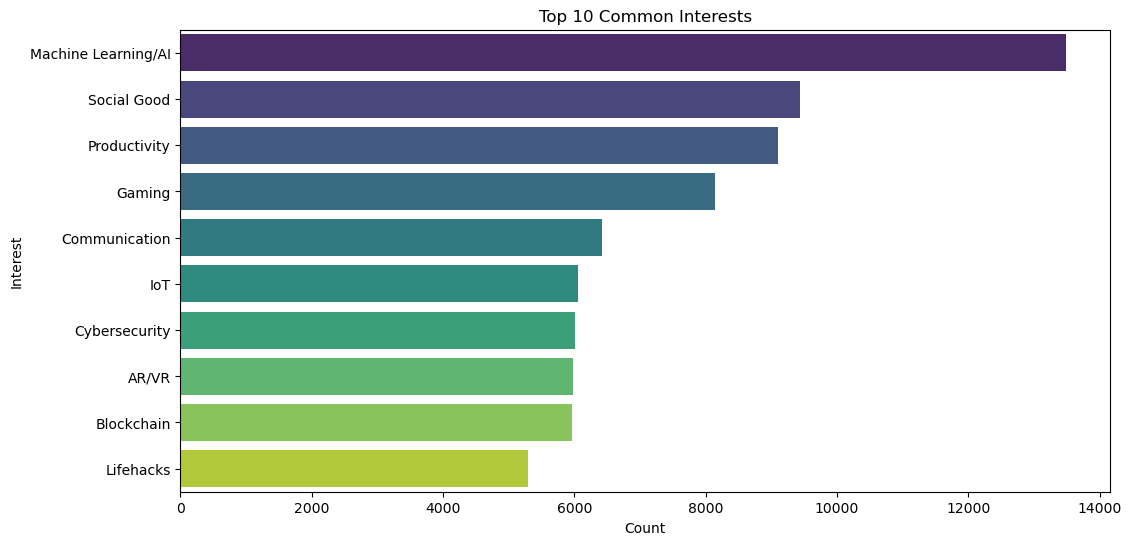

In [27]:
# Plot most common interests
interests_df = pd.DataFrame(common_interests, columns=['Interest', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Interest', data=interests_df, palette='viridis')
plt.title("Top 10 Common Interests")
plt.show()

### Number of projects and hackathons each participant has been involved in

In [28]:
# Count the number of projects
participants_expanded['num_projects'] = participants_expanded['projects'].fillna("").apply(
    lambda x: len(x.split(",")) if x else 0
)

# Count the number of hackathons
participants_expanded['num_hackathons'] = participants_expanded['hackathons'].fillna("").apply(
    lambda x: len(x.split(",")) if x else 0
)

# Display the results
participants_expanded[['name', 'num_projects', 'num_hackathons']]

,name,num_projects,num_hackathons
0,Craig Hiller,1,1
1,Andrew Sheleby,1,1
2,Evan Ho,1,1
3,Brian Lam,4,4
4,lin peng,1,1
...,...,...,...
56490,Mike Dimitrov,1,1
56491,Baiyun (Ben) Gao,1,1
56492,Everet Siew,1,1
56493,Amulya Garimella,1,1


Descriptive Statistics for Number of Number of Projects engaged in by Participants:
count    56495.000000
mean         1.365838
std          1.338204
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         66.000000
Name: num_projects, dtype: float64
Descriptive Statistics for Number of Number of Hackathons engaged in by Participants:
count    56495.000000
mean         1.363360
std          1.335729
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         66.000000
Name: num_hackathons, dtype: float64


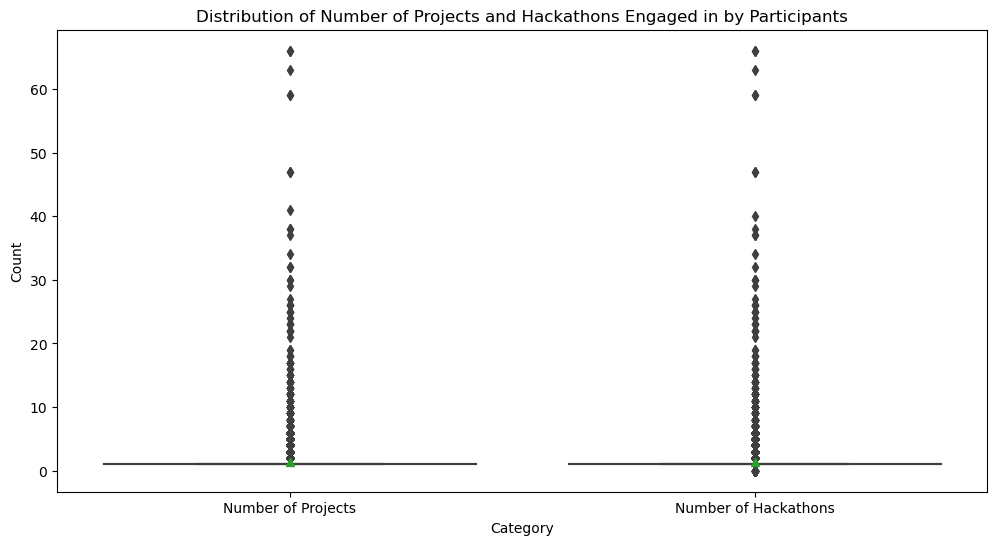

In [29]:
print("Descriptive Statistics for Number of Number of Projects engaged in by Participants:")
print(participants_expanded['num_projects'].describe())

print("Descriptive Statistics for Number of Number of Hackathons engaged in by Participants:")
print(participants_expanded['num_hackathons'].describe())

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=participants_expanded[['num_projects', 'num_hackathons']], showmeans=True)
plt.title("Distribution of Number of Projects and Hackathons Engaged in by Participants")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks([0, 1], ['Number of Projects', 'Number of Hackathons'])
plt.show()

### Is there a correlation between the number of skills and the number of projects/ hackathons they have been involved with?

In [30]:
# Count the number of skills for each participant
participants_expanded['num_skills'] = participants_expanded['skills'].apply(len)

# Calculate correlations
correlation_projects = participants_expanded[['num_skills', 'num_projects']].corr().iloc[0, 1]
correlation_hackathons = participants_expanded[['num_skills', 'num_hackathons']].corr().iloc[0, 1]

correlation_projects, correlation_hackathons
#print('correlation found with number of skills each participant has and the number of projects participated in =',correlation_projects)
print('correlation found with number of skills each participant has and the number of hackathons participated in =',correlation_hackathons)

correlation found with number of skills each participant has and the number of hackathons participated in = 0.13488461112686292


correlation is relatively low meaning Little or no correlation

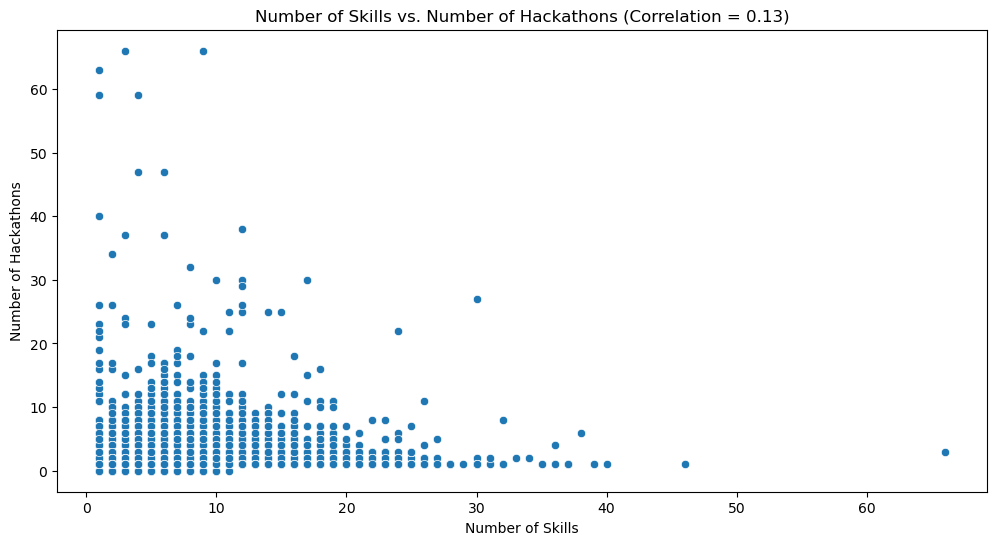

In [31]:
# Scatter plot for number of skills vs. number of hackathons
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_skills', y='num_hackathons', data=participants_expanded)
plt.title(f"Number of Skills vs. Number of Hackathons (Correlation = {correlation_hackathons:.2f})")
plt.xlabel("Number of Skills")
plt.ylabel("Number of Hackathons")
plt.show()

The correlation value in the plot is low, indicating that there isn't a strong linear relationship between the two variables. This could mean that other factors, such as interest or availability, play a more significant role in participation.

The majority of participants have fewer than 10 skills listed but they also participate in more hackathons with the assumed intention to learn and gain more experience.

Participants tend to focus on a limited number of skills and participate in fewer hackathons. This might indicate specialization, where participants focus on honing specific skills rather than being generalists.

Also the one person who has 66 skills has less than 10 hackathons 

### Gender distribution and hackathons

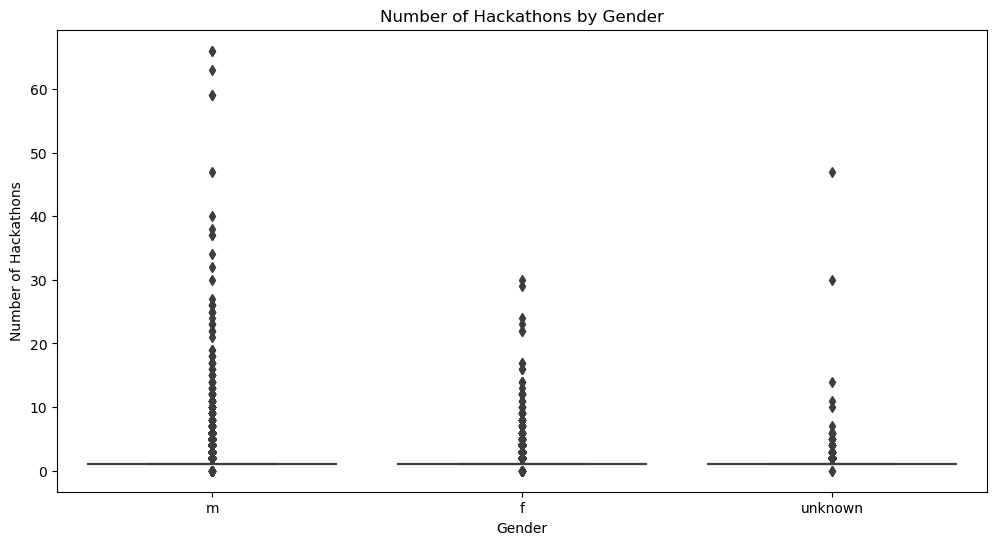

In [32]:
# Box plot for number of hackathons by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='num_hackathons', data=participants_expanded)
plt.title("Number of Hackathons by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Hackathons")
plt.show()

### Distribution of females to males to unknown for each hackathon


In [33]:
participants_expanded

,url,name,website,github,twitter,address,skills,interests,projects,hackathons,cleaned_names,Gender,Gender Probability,genderize.io,Genderize.io Probability,num_projects,num_hackathons,num_skills
0,https://devpost.com/CraigHiller,Craig Hiller,NaN,NaN,NaN,NaN,"[,]","[,]",https://devpost.com/software/googme,https://calhacks.devpost.com/,Craig Hiller,m,1.00,m,1.00,1,1,1
1,https://devpost.com/asheleby,Andrew Sheleby,NaN,NaN,NaN,United States,"[wordpress, python, tableau, excel, Blockchain, ]","[AR/VR, Blockchain, Communication, Cybersecuri...",https://devpost.com/software/helpr-27tjik,https://hackhealth-2021.devpost.com/,Andrew Sheleby,m,1.00,m,1.00,1,1,6
2,https://devpost.com/evanho239,Evan Ho,NaN,NaN,NaN,United States,"[java, c++, javascript, angular.js, css, html,...","[Beginner Friendly, Blockchain, Cybersecurity,...",https://devpost.com/software/untitled-for-now,https://hack32022.devpost.com/,Evan Ho,m,1.00,m,1.00,1,1,8
3,https://devpost.com/brilamb,Brian Lam,https://github.com/Brooseidon,https://github.com/Brooseidon,NaN,US,"[java, javascript, ]","[Communication, Cybersecurity, Gaming, IoT, Ma...",https://devpost.com/software/the-hummingbird-p...,"https://hacksc-2020.devpost.com/,https://sd-ha...",Brian Lam,m,1.00,m,1.00,4,4,3
4,https://devpost.com/linpeng06,lin peng,https://github.com/linpeng06,https://github.com/linpeng06,NaN,NaN,"[android, javascript, php, java, ios, jquery, ...","[,]",https://devpost.com/software/arduinosetup,https://pearlhacks2016.devpost.com/,Lin Peng,m,0.99,m,0.99,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56490,https://devpost.com/mike1572,Mike Dimitrov,https://mikedimitrov.io/,https://github.com/mike1572,NaN,Canada,"[python, java, react, react-native, firebase, ...","[AR/VR, Blockchain, E-commerce/Retail, Fintech...",https://devpost.com/software/textbook-exchange...,https://hack-mcwics-2022.devpost.com/,Mike Dimitrov,m,1.00,m,1.00,1,1,9
56491,https://devpost.com/bengao,Baiyun (Ben) Gao,NaN,NaN,NaN,United States,"[mac, web, windows, ]","[,]",https://devpost.com/software/odataxpt-open-dat...,https://gsatraveldata.devpost.com/,Baiyun ( Ben) Gao,f,0.70,f,0.70,1,1,4
56492,https://devpost.com/EveretS,Everet Siew,NaN,NaN,NaN,NaN,"[,]","[,]",https://devpost.com/software/let-s-greet,https://tactrickdevcup.devpost.com/,Everet Siew,m,1.00,m,1.00,1,1,1
56493,https://devpost.com/amulyagarimella,Amulya Garimella,https://amulyagarimella.github.io/,https://github.com/amulyagarimella,NaN,United States,"[web, react, python, flask, html5, websockets,...","[Beginner Friendly, Design, Education, Health,...",https://devpost.com/software/locavore,https://wafflehacks-2022.devpost.com/,Amulya Garimella,f,0.99,f,0.99,1,1,13


In [34]:

# Step 1: Explode the hackathons column
participants_expanded_exploded = participants_expanded.explode('hackathons')

# Step 2: Group by hackathon URL and Gender and count unique participants
grouped_counts = participants_expanded_exploded.groupby(['hackathons', 'Gender']).size().reset_index(name='count')

# Step 3: Pivot the counts
pivoted_counts = grouped_counts.pivot(index='hackathons', columns='Gender', values='count').fillna(0)

# Rename columns
pivoted_counts = pivoted_counts.rename(columns={'f': 'females_participating', 
                                                'm': 'males_participating',
                                                'unknown': 'unknown_gender_participating'})

# Step 4: Merge with the hackathons DataFrame
merged_df = hackathons.merge(pivoted_counts, left_on='URL', right_index=True, how='left')

# Step 5: Validation (optional)
merged_df['total_participating'] = merged_df['females_participating'] + \
                                   merged_df['males_participating'] + \
                                   merged_df['unknown_gender_participating']

merged_df['is_valid'] = merged_df['total_participating'] == merged_df['registered_N']

# Drop the validation columns for the final result
merged_df = merged_df.drop(columns=['total_participating', 'is_valid'])

# Final result
print(merged_df)


                                               URL  \
0         https://wirvsvirushackathon.devpost.com/   
1               https://theglobalhack.devpost.com/   
2                   https://supernova.devpost.com/   
3               https://hajjhackathon.devpost.com/   
4         https://chainlinkspring2022.devpost.com/   
...                                            ...   
7048           https://checkinproject.devpost.com/   
7049                  https://fgtfrgf.devpost.com/   
7050                https://old-hacks.devpost.com/   
7051  https://thailand-champion-13627.devpost.com/   
7052        https://manager-hackathon.devpost.com/   

                                       Judging Criteria     schedule  \
0     Gesellschaftlicher Mehrwert, Innovationsgrad, ...  no schedule   
1     Potential impact of the project, Technical exe...  no schedule   
2     X Factor and Potential, Technical Competence, ...  no schedule   
3     Design           |             التصميم, Simpli...  no sch

In [35]:
merged_df[['females_participating', 'males_participating',
       'unknown_gender_participating','registered_N','URL']]

,females_participating,males_participating,unknown_gender_participating,registered_N,URL
0,175.0,396.0,28.0,12505,https://wirvsvirushackathon.devpost.com/
1,85.0,186.0,20.0,6059,https://theglobalhack.devpost.com/
2,7.0,36.0,1.0,3633,https://supernova.devpost.com/
3,102.0,261.0,18.0,2935,https://hajjhackathon.devpost.com/
4,11.0,59.0,1.0,1481,https://chainlinkspring2022.devpost.com/
...,...,...,...,...,...
7048,NaN,NaN,NaN,1,https://checkinproject.devpost.com/
7049,NaN,NaN,NaN,1,https://fgtfrgf.devpost.com/
7050,NaN,NaN,NaN,1,https://old-hacks.devpost.com/
7051,NaN,NaN,NaN,0,https://thailand-champion-13627.devpost.com/


From this it is clear that the registered_N may not be equal to the number of people who actually ended up participating and submitting something. Thus, creating another column that is called actual_participants_N which is a sum of the values of females_participating + males_participating + unknown_gender_participating:

In [36]:
# Creating the actual_participants_N column
merged_df['actual_participants_N'] = (
    merged_df['females_participating'].fillna(0) +
    merged_df['males_participating'].fillna(0) +
    merged_df['unknown_gender_participating'].fillna(0)
)

# Displaying the result
merged_df[['females_participating', 'males_participating',
                 'unknown_gender_participating', 'registered_N',
                 'actual_participants_N', 'URL']]

,females_participating,males_participating,unknown_gender_participating,registered_N,actual_participants_N,URL
0,175.0,396.0,28.0,12505,599.0,https://wirvsvirushackathon.devpost.com/
1,85.0,186.0,20.0,6059,291.0,https://theglobalhack.devpost.com/
2,7.0,36.0,1.0,3633,44.0,https://supernova.devpost.com/
3,102.0,261.0,18.0,2935,381.0,https://hajjhackathon.devpost.com/
4,11.0,59.0,1.0,1481,71.0,https://chainlinkspring2022.devpost.com/
...,...,...,...,...,...,...
7048,NaN,NaN,NaN,1,0.0,https://checkinproject.devpost.com/
7049,NaN,NaN,NaN,1,0.0,https://fgtfrgf.devpost.com/
7050,NaN,NaN,NaN,1,0.0,https://old-hacks.devpost.com/
7051,NaN,NaN,NaN,0,0.0,https://thailand-champion-13627.devpost.com/


In [37]:
# Assuming merged_df already exists and has the 'actual_participants_N' column
count_zero_or_nan = ((merged_df['actual_participants_N'] == 0) | (merged_df['actual_participants_N'].isna())).sum()

print(count_zero_or_nan)

# Remove rows where actual_participants_N is 0 or NaN
merged_df = merged_df[(merged_df['actual_participants_N'] != 0) & (~merged_df['actual_participants_N'].isna())]

2173


In [38]:
merged_df

,URL,Judging Criteria,schedule,hack_type,info,start_date_format,end_date_format,Prizes,prize_money,Id,...,Requirements,normalized_location,participation_type,prize_money_status,duration_days,theme_domain_focus,females_participating,males_participating,unknown_gender_participating,actual_participants_N
0,https://wirvsvirushackathon.devpost.com/,"Gesellschaftlicher Mehrwert, Innovationsgrad, ...",no schedule,Public,"Mar 29, 2020, Online, Public, Social Good ...",2020-03-20,2020-03-22,"Euer Preis ist Anerkennung und Ehre!, Habt Spa...",no money prize,9683,...,Diese Hackathon Seite richtet sich an die Teil...,online,Online,No Prize Money,2,Networking,175.0,396.0,28.0,599.0
1,https://theglobalhack.devpost.com/,"Potential impact of the project, Technical exe...",no schedule,Public,"Apr 12, 2020, Online, Public, COVID-19",2020-04-03,2020-04-09,Overall Winner,no money prize,9854,...,Participants: Individuals (over 18 years in ag...,online,Online,No Prize Money,6,Networking,85.0,186.0,20.0,291.0
2,https://supernova.devpost.com/,"X Factor and Potential, Technical Competence, ...",no schedule,Public,"Jul 11, 2022, Online, Public, DFINITY Foundati...",2022-05-10,2022-06-22,"SocialFi - 1ST PLACE, SocialFi - 2ND PLACE, So...","$765,000",13738,...,HACKATHON TRACKS The hackathon has six super i...,online,Online,Has Prize Money,43,"Development, Experience, Networking",7.0,36.0,1.0,44.0
3,https://hajjhackathon.devpost.com/,"Design | التصميم, Simpli...",no schedule,Public,"Aug 3, 2018, Jeddah International Exhibition &...",2018-08-01,2018-08-03,1st place: 1 million Saudi Riyal (15% equity i...,"SAR2,000,000",6815,...,Devpost Deadline 1 - First project submission ...,jeddah international exhibition & convention c...,Offline,Has Prize Money,2,Not Specified,102.0,261.0,18.0,381.0
4,https://chainlinkspring2022.devpost.com/,"User Experience / User Interface, Originality ...",no schedule,Public,"Jun 8, 2022, Online, Public, Chainlink Labs, B...",2022-04-22,2022-05-28,"Chainlink Grand Prize - $40,000, Chainlink NFT...","$1,019,000",15086,...,Each project must use Chainlink in some form t...,online,Online,Has Prize Money,36,Development,11.0,59.0,1.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,https://genhacks-iv.devpost.com/,First Place,no schedule,Public,"Mar 19 – 21, 2021, Online, Public, Mission Vis...",2021-03-20,2021-03-21,First Place,"$7,000",12314,...,If you are a student at Irvine Valley College ...,online,Online,Has Prize Money,1,"Development, Networking",0.0,1.0,0.0,1.0
7021,https://bockbockhack.devpost.com/,"Big Brain, Technical challenge, Polish/Integra...",no schedule,Invite only,"Jun 13 – 14, 2022, University of Cambridge - J...",2022-06-13,2022-06-14,"1st Prize, 2nd Prize, 3rd Prize, Biggest Brain...",£222,15634,...,We highly recommend hosting your source code o...,university of cambridge - jesus college,Offline,Has Prize Money,1,"Experience, Learning",0.0,1.0,0.0,1.0
7024,https://valleyhacks2021.devpost.com/,"Functionality, Originality, Scope, Design",no schedule,Public,"Apr 9 – 11, 2021, Online, Public, Irvine Valle...",2021-04-10,2021-04-11,"1st Place, 2nd Place, 3rd Place",$175,11831,...,Submit your pitch deck in PDF form (please con...,online,Online,Has Prize Money,1,Experience,0.0,1.0,0.0,1.0
7035,https://provihack.devpost.com/,"Qualidade, teste",no schedule,Invite only,"Nov 19, 2021 – Apr 14, 2022, Online, Invite on...",2021-11-19,2022-04-14,TBD (3),no money prize,13442,...,Grand Prize hehe,online,Online,No Prize Money,146,"Learning, Networking",0.0,1.0,0.0,1.0
